In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

## Объявление функций

In [3]:
def func1(x, y):
    return y - y * x;

def func2_1(x, u, v):
    return np.log2(2*x + (4*x*x + v*v)**(1/2))

def func2_2(x, u, v):
    return (4*x*x + u*u)**(1/2)

In [4]:
def ans1(x):
    return 5 * np.exp((-1/2)*x*(x-2))

## Функции решения дифференциального уравнения и системы                                       
## ОДУ второго порядка точности

In [5]:
def diff2(x0, y0, func, x_length = 20, a = 1, n = 100):
    h = float(x_length) / n
    x = np.arange(x0, x0 + x_length + h, h)
    y = np.array([0.0]*len(x))
    y[0] = y0
    for i in range(len(x)-1):
        y[i+1] = y[i] +((1 - a)*func(x[i], y[i]) 
                    + a*func(x[i] + float(h) / (2*a), y[i] 
                    + (float(h) / (2*a)) * func(x[i], y[i])))*h
    return x, y

In [6]:
def diff2_sys(x0, y00, y01, func, x_length=10, n=100, a=1):
    h = float(x_length) / n
    x = np.arange(x0, x0 + x_length + h, h)
    y = np.array([[0.0]*len(x)]*2)
    y[0][0] = y00
    y[1][0] = y01
    coef = float(h) / (2*a)
    for i in range(len(x)-1):
        for j in range(2):
            func_ij = func[j](x[i], y[0][i], y[1][i])
            y[j][i+1] = y[j][i] + ((1 - a)*func_ij
                         + a*func[j](x[i] + coef, 
                            y[0][i] + coef * func_ij, 
                            y[1][i] + coef * func_ij))*h
    return x, y

## Тестирование алгоритмов 2-го и 4-го

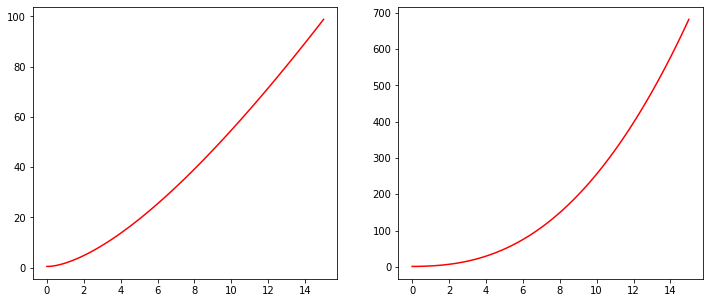

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
x, y = diff2_sys(0.0, 0.5, 1, [func2_1, func2_2], x_length=15, n = 100, a = 1)
for i in range(2):
    axes[i].plot(x, y[i], color="r")

## Функции решения дифференциального уравнения 
## и системы ОДУ четвертого порядка точности

In [8]:
def diff4(x0, y0, func, x_length=15, n=100):
    h = float(x_length) / n
    x = np.arange(x0, x0 + x_length + h, h)
    y = np.array([0.0]*len(x))
    y[0] = y0
    for i in range(len(x)-1):
        k1 = func(x[i], y[i])
        k2 = func(x[i] + h / 2, y[i] + (h / 2)*k1)
        k3 = func(x[i] + (h / 2), y[i] + (h / 2)*k2)
        k4 = func(x[i] + h, y[i] + h*k3)
        y[i+1] = y[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return x, y

In [9]:
def diff4_sys(x0, y00, y01, func1, func2, x_length=10, n=100):
    h = float(x_length) / n
    x = np.arange(x0, x0 + x_length + h, h)
    y = np.array([[0.0]*len(x)]*2)
    y[0][0] = y00
    y[1][0] = y01
    for i in range(len(x) - 1):
        k1 = func1(x[i], y[0][i], y[1][i])
        m1 = func2(x[i], y[0][i], y[1][i])
        
        k2 = func1(x[i] + h / 2, y[0][i] + (h / 2)*k1, y[1][i] + (h / 2)*m1)
        m2 = func2(x[i] + h / 2, y[0][i] + (h / 2)*k1, y[1][i] + (h / 2)*m1)
        
        k3 = func1(x[i] + (h / 2), y[0][i] + (h / 2)*k2, y[1][i] + (h / 2)*m2)
        m3 = func2(x[i] + (h / 2), y[0][i] + (h / 2)*k2, y[1][i] + (h / 2)*m2)
        
        k4 = func1(x[i] + h, y[0][i] + h*k3, y[1][i] + h*m3)
        m4 = func2(x[i] + h, y[0][i] + h*k3, y[1][i] + h*m3)
        
        y[0][i+1] = y[0][i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        y[1][i+1] = y[1][i] + (h / 6) * (m1 + 2*m2 + 2*m3 + m4)
    return x, y

## Тестирование алгоритмов 2-го порядка и 4-го порядка 

In [10]:
def norm(y, y_pred): # функция для вычсления нормы max|y_i - y(x_i)| i=0...n
    norm = 0
    for i in range(len(y)):
        if np.fabs(y_pred[i] - y[i]) > norm:
            norm = np.fabs(y_pred[i] - y[i])
    return norm

Норма для алгоритма 2-го порядка точности:  0.024218011443865706
Норма для алгоритма 4-го порядка точности:  0.00026909639525019013


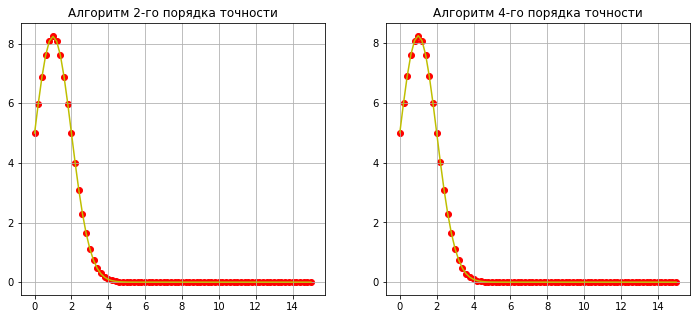

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
x, y = diff2(0.0, 5.0, func1, x_length=15, n = 75, a = 1)
axes[0].scatter(x, y, color="r")
axes[0].grid()
y_ = ans1(x)
axes[0].set_title('Алгоритм 2-го порядка точности')
axes[0].plot(x, y_, color="y")

print("Норма для алгоритма 2-го порядка точности: ", norm(y, y_))

x, y = diff4(0.0, 5.0, func1, x_length=15, n = 75)
axes[1].scatter(x, y, color="r")
axes[1].grid()
y_ = ans1(x)
axes[1].set_title('Алгоритм 4-го порядка точности')
axes[1].plot(x, y_, color="y")
print("Норма для алгоритма 4-го порядка точности: ", norm(y, y_))

## Тестирование алгоритмов 2-го порядка 
## и 4-го порядка системы ОДУ

In [14]:
def ans_u(x):
    return np.exp(x) + np.exp(5.0*x)

def ans_v(x):
    return -np.exp(x) + 3.0*np.exp(5.0*x)

def func3_1(x, u, v):
    return 2.0*u + v

def func3_2(x, u, v):
    return 3.0*u + 4*v

Норма для алгоритма 2-го порядка точности (коэффициент):  1.9257046456068e+33
Норма для алгоритма 4-го порядка точности (коэффициент):  1.4918172747090327e+33


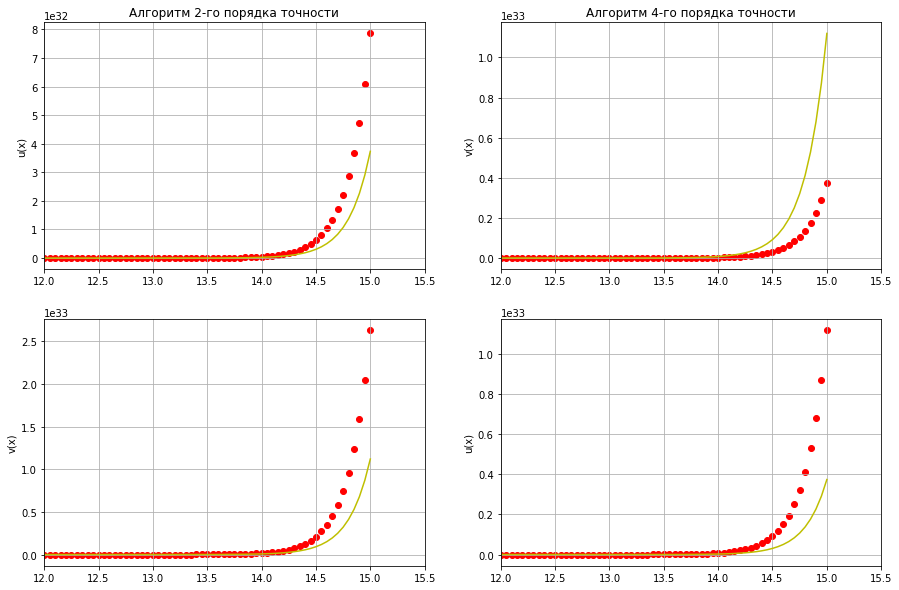

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
x, y = diff2_sys(0.0, 2.0, 2.0, [func3_1, func3_2], x_length=15, n = 300, a = 1)

norm_2 = 0
axes[0, 0].set_title("Алгоритм 2-го порядка точности")
for i in range(2):
    axes[i, 0].scatter(x, y[i], color="r")
    axes[i, 0].grid()
    if i == 0:
        axes[i, 0].plot(x, ans_u(x), "y")
        axes[i, 0].set_ylabel("u(x)")
        norm_2 += norm(y[i], ans_u(x))
    else:
        axes[i, 0].plot(x, ans_v(x), "y")
        axes[i, 0].set_ylabel("v(x)")
        norm_2 += norm(y[i], ans_v(x))
    axes[i, 0].set_xlim(12, 15.5)    
    
x, y = diff4_sys(0.0, 2.0, 2.0, func3_1, func3_2, n=300, x_length=15)
norm_4 = 0
axes[0, 1].set_title("Алгоритм 4-го порядка точности")
for i in range(2):
    axes[i, 1].scatter(x, y[i], color="r")
    axes[i, 1].grid()
    if i == 1:
        axes[i, 1].plot(x, ans_u(x), "y")
        axes[i, 1].set_ylabel("u(x)")
        norm_4 += norm(y[i], ans_u(x))
    else:
        axes[i, 1].plot(x, ans_v(x), "y")
        axes[i, 1].set_ylabel("v(x)")
        norm_4 += norm(y[i], ans_v(x))
    axes[i, 1].set_xlim(12, 15.5)

print("Норма для алгоритма 2-го порядка точности (коэффициент): ", norm_2)
print("Норма для алгоритма 4-го порядка точности (коэффициент): ", norm_4)

In [22]:
def f(y, t):
    y1, y2 = y
    return [np.sin(1.4 * y1 ** 2) - t + y2, t + y1 - 2.2 * y2 ** 2 + 1]

In [23]:
def func2(y, t):
    y1, y2 = y
    return [func2_1(t, y1, y2), func2_2(t, y1, y2)]

Норма для алгоритма 2-го порядка точности:  90.98226572653365
Норма для алгоритма 4-го порядка точности:  0.003445321322374184


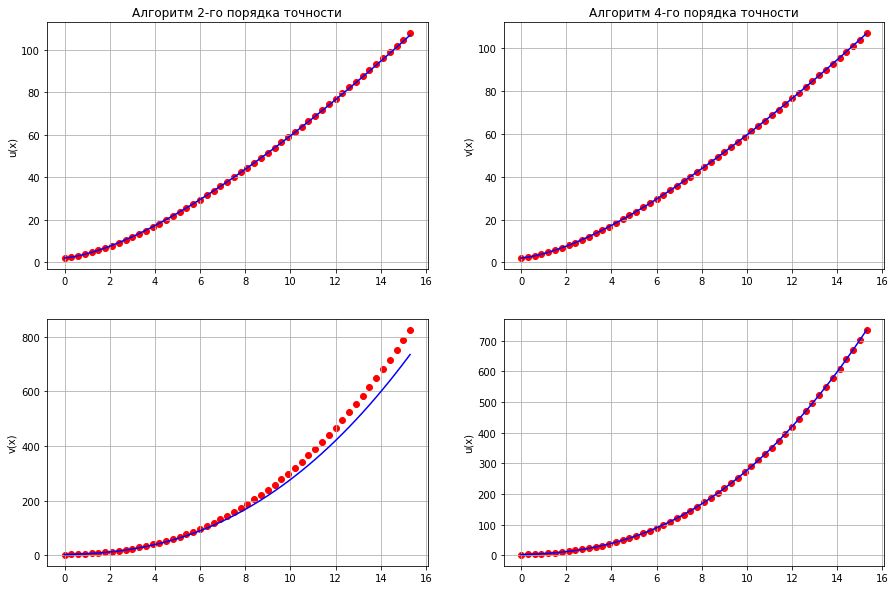

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
x, y = diff2_sys(0.0, 2.0, 2.0, [func2_1, func2_2], x_length=15, n = 50, a = 0.5)

y0 = [2.0, 2.0]
y_ = odeint(func2, y0, x)

norm_2 = 0
axes[0, 0].set_title("Алгоритм 2-го порядка точности")
for i in range(2):
    axes[i, 0].scatter(x, y[i], color="r")
    axes[i, 0].plot(x, y_[:, i], color="b")
    axes[i, 0].grid()
    if i == 0:
        axes[i, 0].set_ylabel("u(x)")
    else:
        axes[i, 0].set_ylabel("v(x)")
        
    norm_2 += norm(y[i], y_[:, i])  
    
norm_4 = 0
x, y = diff4_sys(0.0, 2.0, 2.0, func2_1, func2_2, n=50, x_length=15)
axes[0, 1].set_title("Алгоритм 4-го порядка точности")
for i in range(2):
    axes[i, 1].scatter(x, y[i], color="r")
    axes[i, 1].plot(x, y_[:, i], color="b")
    axes[i, 1].grid()
    if i == 1:
        axes[i, 1].set_ylabel("u(x)")
    else:
        axes[i, 1].set_ylabel("v(x)")
    norm_4 += norm(y[i], y_[:, i])  

print("Норма для алгоритма 2-го порядка точности: ", norm_2)
print("Норма для алгоритма 4-го порядка точности: ", norm_4)